In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import spacy
from ast import literal_eval
import folium


#need to run this line in terminal to install the Spanish lemmatization library - >> python -m spacy download es_core_news_sm

nlp = spacy.load('es_core_news_sm')


df1 = pd.read_csv('Airtables/CBP One 23/Cleaned Privilege Document CBP ONE 2023.csv')

df2 = pd.read_csv("Airtables/LAMX Front Desk Data/LAMX Front Desk (Combined) data.csv")

df3 = pd.read_csv('Airtables/T42_Exceptions Post Consortium/CleanedT42File.csv')

df4 = pd.read_csv('Airtables/T42_Screenings/T42 Screenings (Combined) data.csv')

df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
df = df.drop_duplicates()
df

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Location,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,Birth Country
0,2023-01-24 00:00:00.000,Andrea Arias Guillen,Mexico,1994-12-16 00:00:00,Solo el proceso fue lento con la app del CBPone,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-24 00:00:00.000,Winder Roberto Pernia Jimenez,Colombia,1991-10-15 00:00:00,NaN,4.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-24 00:00:00.000,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05 00:00:00,NaN,3.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-24 00:00:00.000,Pedro Rios,Mexico,1972-06-11 00:00:00,NaN,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-24 00:00:00.000,Lesly Martinez,Honduras,1972-04-13 00:00:00,No puede enviar su informacion ha batallado mu...,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,06/11/2021,Rosa Maria Sales,Guatemala,8/7/2009,Verified no status in a third country/no US de...,4.0,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN
10919,06/11/2021,Liliana Maceda Roque,Mexico,10/12/2001,NaN,2.0,Si,No,NaN,NaN,No,NaN,NaN,Por amenazas tengo mucho miedo q me maten ami ...,NaN
10920,06/11/2021,Keylin Minora Zepeda Banegas,Honduras,11/6/1989,NaN,2.0,Si,No,NaN,NaN,No,NaN,NaN,Pues me da miedo salir ala calle me da miedo m...,NaN
10921,06/11/2021,Brenda Yamileth Lara barahona,Honduras,16/5/1989,Verified no status in a third country/no US de...,3.0,Si,No,NaN,NaN,Si,Estoy padesiendoede trauma insomnio nervios,NaN,Yo Brenda Yamileth Lara barahona fui secuestra...,NaN


In [2]:
df_no_duplicates = df.drop_duplicates(subset=['Name'])
df_no_duplicates

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Location,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,Birth Country
0,2023-01-24 00:00:00.000,Andrea Arias Guillen,Mexico,1994-12-16 00:00:00,Solo el proceso fue lento con la app del CBPone,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-24 00:00:00.000,Winder Roberto Pernia Jimenez,Colombia,1991-10-15 00:00:00,NaN,4.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-24 00:00:00.000,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05 00:00:00,NaN,3.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-24 00:00:00.000,Pedro Rios,Mexico,1972-06-11 00:00:00,NaN,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-24 00:00:00.000,Lesly Martinez,Honduras,1972-04-13 00:00:00,No puede enviar su informacion ha batallado mu...,1.0,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,06/11/2021,Rosa Maria Sales,Guatemala,8/7/2009,Verified no status in a third country/no US de...,4.0,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN
10919,06/11/2021,Liliana Maceda Roque,Mexico,10/12/2001,NaN,2.0,Si,No,NaN,NaN,No,NaN,NaN,Por amenazas tengo mucho miedo q me maten ami ...,NaN
10920,06/11/2021,Keylin Minora Zepeda Banegas,Honduras,11/6/1989,NaN,2.0,Si,No,NaN,NaN,No,NaN,NaN,Pues me da miedo salir ala calle me da miedo m...,NaN
10921,06/11/2021,Brenda Yamileth Lara barahona,Honduras,16/5/1989,Verified no status in a third country/no US de...,3.0,Si,No,NaN,NaN,Si,Estoy padesiendoede trauma insomnio nervios,NaN,Yo Brenda Yamileth Lara barahona fui secuestra...,NaN


In [3]:
df_no_duplicates['Name'].value_counts()

Name
Alejandro Bailón Daniela Bailon     1
Andrea Arias Guillen                1
Winder Roberto Pernia Jimenez       1
Maria de la Luz Gonzalez Olvera     1
Pedro Rios                          1
                                   ..
Litzy Berenice Saucedo Vasquez      1
Citlaly Gonzalez Mena               1
Ledys Judtih Ramirez Cherinos       1
Carminda Xiomara Murillo Garcia     1
Eduardo Salinas Guevara             1
Name: count, Length: 10117, dtype: int64

In [4]:
print(df['Total Family Members'].value_counts())

more_than_1 = df[df['Total Family Members'] != 1]['Total Family Members'].count()
total= df['Total Family Members'].count()
print(more_than_1)
print(total)
print(f"{more_than_1/total} of parties that are not singles" )

Total Family Members
1.0     3232
3.0     2207
2.0     2123
4.0     1568
5.0      884
6.0      516
7.0      229
8.0       54
10.0      34
9.0       26
11.0       8
13.0       5
0.0        4
12.0       3
15.0       1
Name: count, dtype: int64
7662
10894
0.7033229300532403 of parties that are not singles


In [5]:
df['Total Family Members'] = df['Total Family Members'].fillna(1)
df['Total Family Members'] = df['Total Family Members'].replace(0,1)

In [6]:
nan_count = df['Total Family Members'].isna().sum()
print(nan_count)

0


In [7]:
print(f"Total Number of people in every party: \033[1m{int(df['Total Family Members'].sum())}\033[0m")
print(f"Average Party Size: \033[1m{df['Total Family Members'].mean()}\033[0m")
#prior to turning every row that didnt have the total family members into a 

Total Number of people in every party: 30705
Average Party Size: 2.8182652592932538


In [8]:
df['LGBTQ+'] = df['LGBTQ+'].replace(False, "No")
df['LGBTQ+'] = df['LGBTQ+'].replace(True, "Si")
df['LGBTQ+'] = df['LGBTQ+'].replace("Prefiero no decir", "Unknown")
df['LGBTQ+'] = df['LGBTQ+'].replace( "Mi niño es ciudadano estadounidense nacio el 14 de abril de 2017 en el hospital Mission  en Alton texas.","Unknown")


df['LGBTQ+'].value_counts()


LGBTQ+
No         7536
Unknown    1171
Si         1157
Name: count, dtype: int64

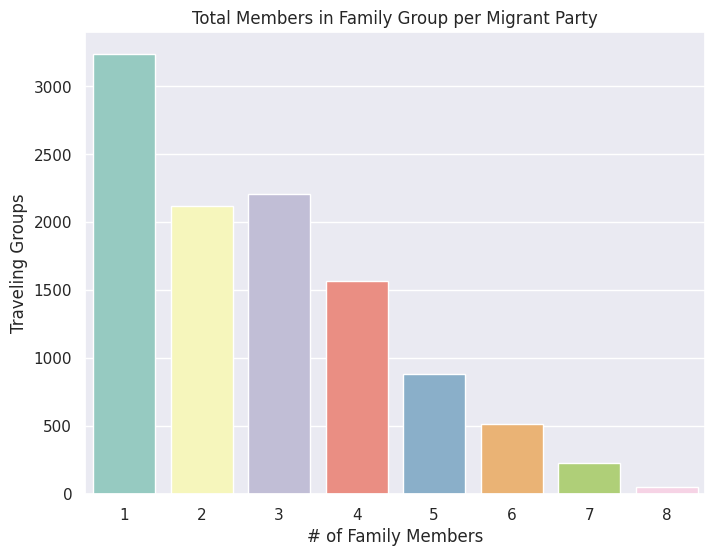

In [9]:
# Create a count plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
df['Total Family Members'] = df['Total Family Members'].astype(int)
sns.countplot(x='Total Family Members', data=df, palette="Set3", hue="Total Family Members", legend=False, order=sorted(df['Total Family Members'].unique())[:-6])

# Customize the plot (optional)
plt.title('Total Members in Family Group per Migrant Party')
plt.xlabel('# of Family Members')
plt.ylabel('Traveling Groups')
plt.savefig('Total Members in Family Group per Migrant Party.png', bbox_inches='tight')
# Show the plot
plt.show()


Country of Origin
Haiti                   3448
Mexico                  1874
Honduras                1705
Guatemala                857
Venezuela                851
El Salvador              431
Cuba                     136
Other                    107
Nicaragua                 95
Colombia                  73
Ecuador                   55
Brazil                     2
Republica Dominicana       1
Cameroon                   1
Name: count, dtype: int64


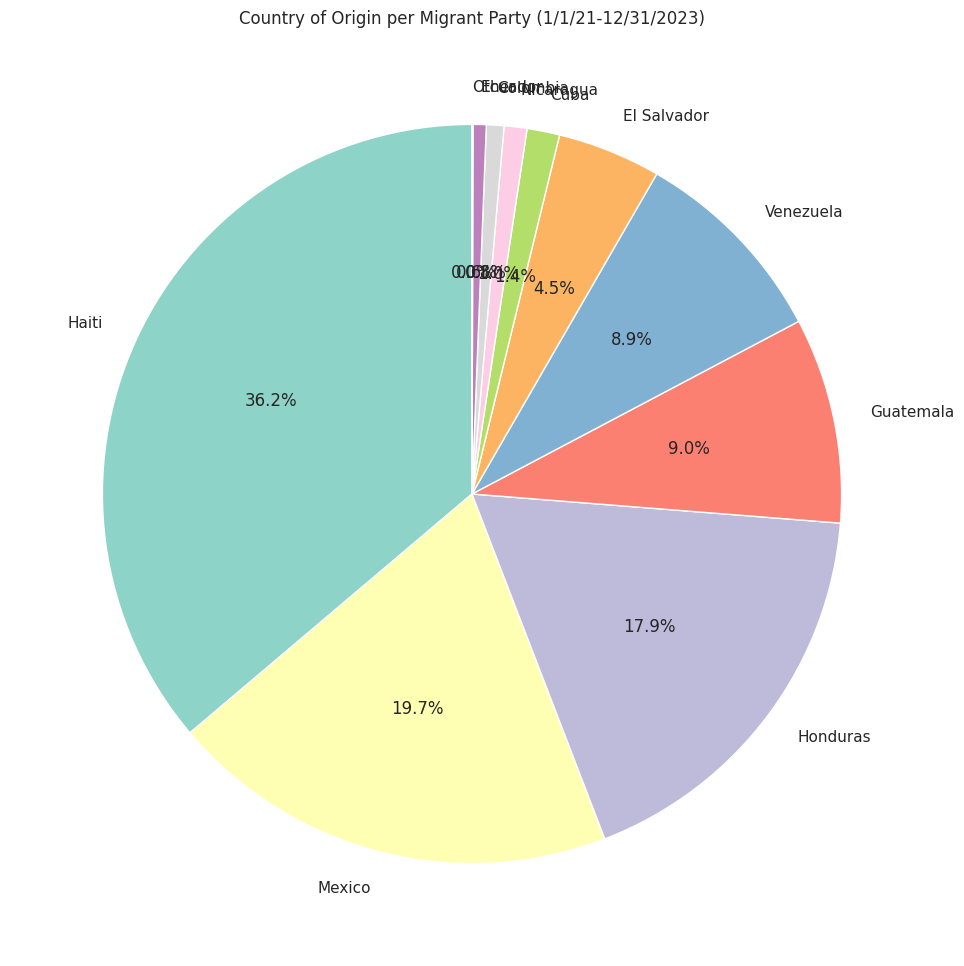

In [10]:
country_mapping = {
    'México': 'Mexico',
    'Venezula': 'Venezuela',
    'Nicaragua': 'Nicaragua',
    'venezuela' : 'Venezuela',
    'Otro': 'Other',
    "mexico": "Mexico",
    "Mujer" : "Other",
    "Hombre" : "Other"
}



df["Country of Origin"] = df["Country of Origin"].replace(country_mapping).str.strip()

category_counts = df['Country of Origin'].value_counts()
print(category_counts)
lowest_categories = category_counts.nsmallest(3).index.tolist()

# Combine them into "Other"
category_counts['Other'] = category_counts[lowest_categories].sum()
category_counts = category_counts.drop(lowest_categories)
category_counts = category_counts.sort_values(ascending=False)


# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Country of Origin per Migrant Party (1/1/21-12/31/2023)')
plt.savefig("Country of Origin per Migrant Party.png")

# Show the plot
plt.show()


In [11]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

value_counts = df['Country of Origin'].value_counts()

value_counts_df = pd.DataFrame(value_counts).reset_index()

# Rename columns
value_counts_df.columns = ['Country', 'Count']

central_america_coords = [14.69, -90.53]

# Create a map centered around Central America
m = folium.Map(location=central_america_coords, zoom_start=4)

folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Immigration Country',
    data=value_counts_df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    fill_color='RdYlGn_r',
    nan_fill_color='white',
    legend_name="Person per Country",

).add_to(m)

m


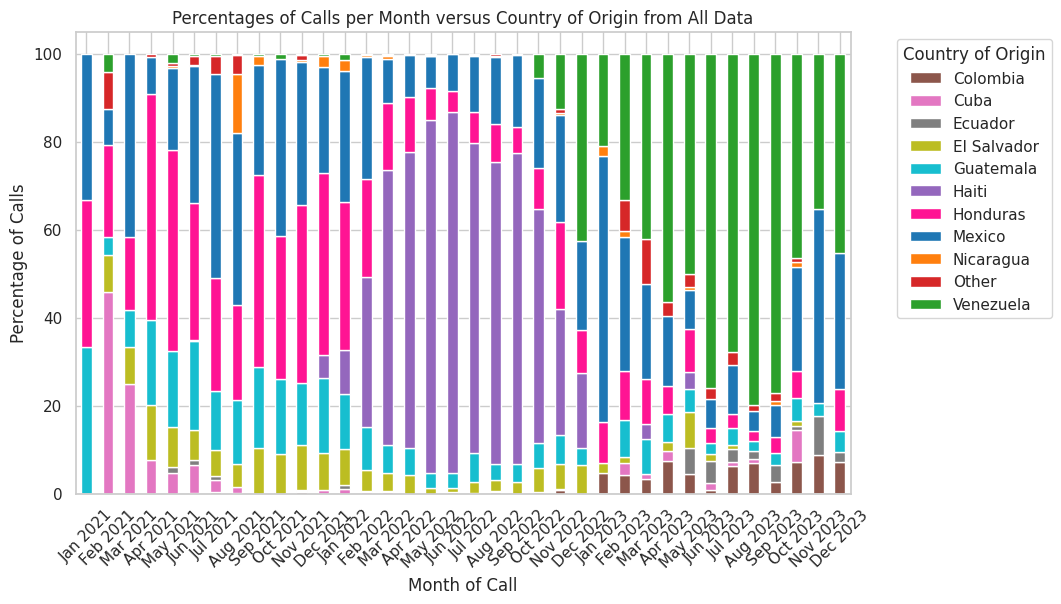

In [12]:
import calendar
import matplotlib as mpl
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
def replace_dates_before(date):
    start_date = datetime.strptime("2021-1-01", '%Y-%m-%d')
    if date < start_date:
        return start_date
    else:
        return date


df['Date'] = df['Date'].apply(replace_dates_before)
# Step 3: Extract month from 'Date of Appt' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

value_counts = df['Country of Origin'].value_counts()

# Get values occurring less than 5 times
values_to_replace = value_counts[value_counts < 5].index.tolist()

# Replace values with 'Other'
df['Country of Origin'] = df['Country of Origin'].replace(values_to_replace, 'Other')


# Step 4: Group data by month and country of origin
grouped = df.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


'''cmap = plt.cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=len(percentages) - 1)
colors = [cmap(norm(i)) for i in range(len(percentages))]
'''

# Step 6: Plot the bar graph
#ax = percentages.plot(kind='bar', stacked=True,figsize=(16, 12), color=['#6495ED', '#3CB371','#FF6347', '#9370DB', '#FA8072', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9467bd', '#ff1493', '#1f77b4', '#ff7f0e', '#d62728','#2ca02c'])
#ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#03A9F4', '#F44336', '#FFEB3B', '#795548'])
#ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#7CB342', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#FFD700', '#F44336', '#FFEB3B', '#8D6E63'])

plt.xlabel('Month of Call')
plt.ylabel('Percentage of Calls')
plt.title('Percentages of Calls per Month versus Country of Origin from All Data')
plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.savefig("Call Log by Month.png", bbox_inches='tight')
plt.show()


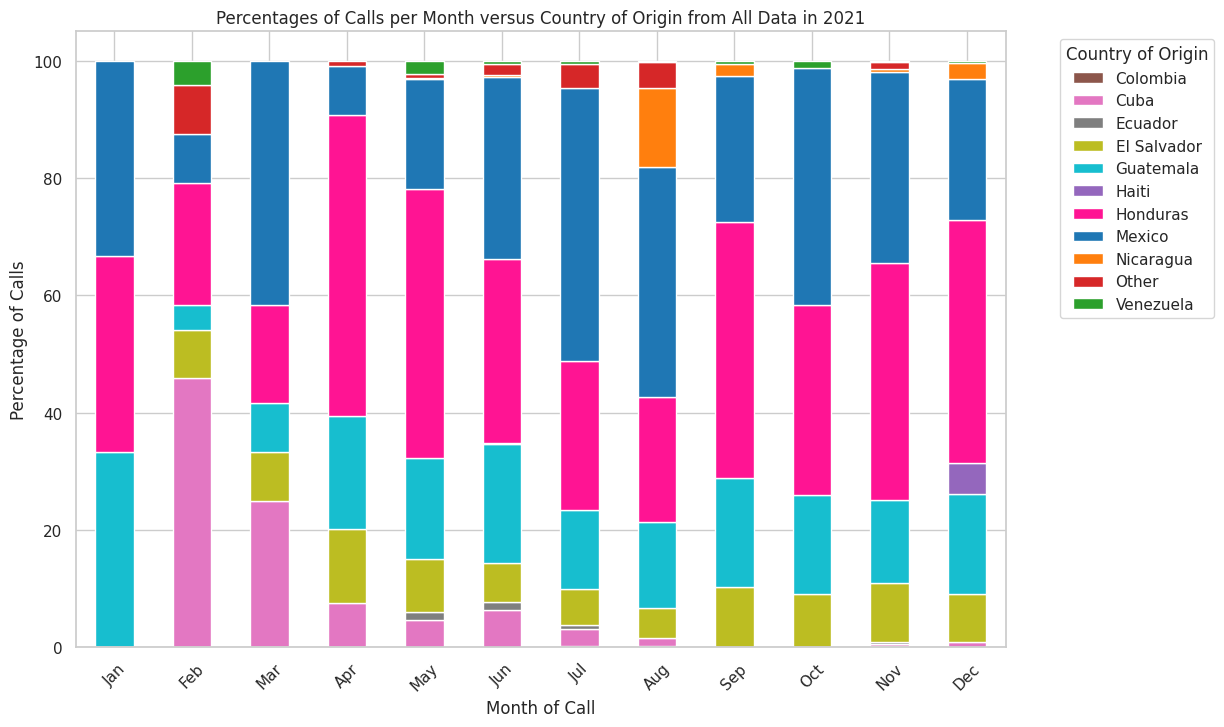

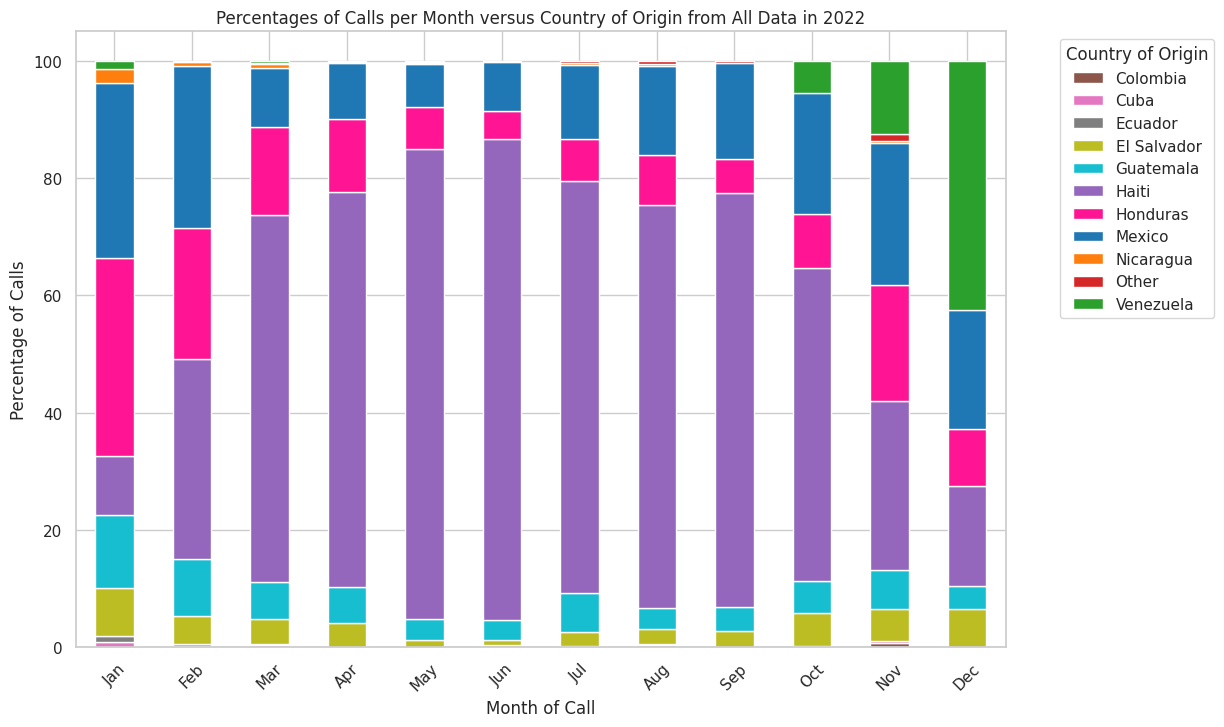

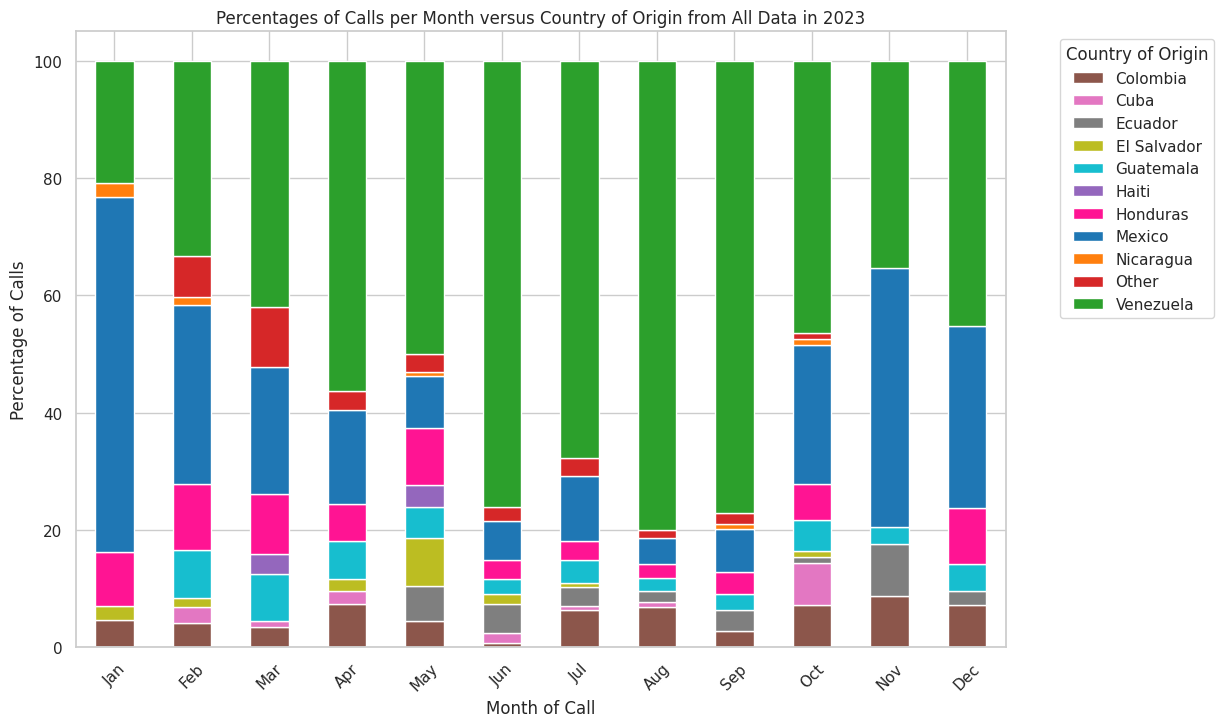

In [13]:
grouped_by_year = percentages.groupby(level=0)

# Initialize a list to hold the individual percentages by year
individual_percentages_by_year = []

# Calculate percentages within each year
for year, group in grouped_by_year:
    total_counts_by_year = group.sum(axis=1)
    individual_percentages_by_year.append(group.div(total_counts_by_year, axis=0) * 100)
for percentages_by_year in individual_percentages_by_year:
    #print((individual_percentages_by_year[0]))
    ax = percentages_by_year.plot(kind='bar', stacked=True, figsize=(12, 8 ), color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9467bd', '#ff1493', '#1f77b4', '#ff7f0e', '#d62728','#2ca02c'])
    #ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#03A9F4', '#F44336', '#FFEB3B', '#795548'])
    #ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#7CB342', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#FFD700', '#F44336', '#FFEB3B', '#8D6E63'])
    plt.xlabel('Month of Call')
    plt.ylabel('Percentage of Calls')
    plt.title(f'Percentages of Calls per Month versus Country of Origin from All Data in {int(percentages_by_year.index[0][0])}')
    plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(len(percentages_by_year)), [f"{calendar.month_abbr[int(month)]}" for year, month in percentages_by_year.index], rotation=45)
    #plt.tight_layout()
    plt.savefig(f"Call Log by Month in {int(percentages_by_year.index[0][0])}.png", bbox_inches='tight')
    plt.show()




8465
Country of Origin
Colombia         15
Cuba            118
Ecuador          26
El Salvador     413
Guatemala       809
Haiti          3426
Honduras       1638
Mexico         1694
Nicaragua        90
Other            79
Venezuela       157
dtype: int64
Country of Origin
Colombia         3
Cuba            12
Ecuador          6
El Salvador     68
Guatemala       91
Haiti          230
Honduras       192
Mexico         363
Nicaragua       28
Other           19
Venezuela       30
Name: LGBTQ+, dtype: int64


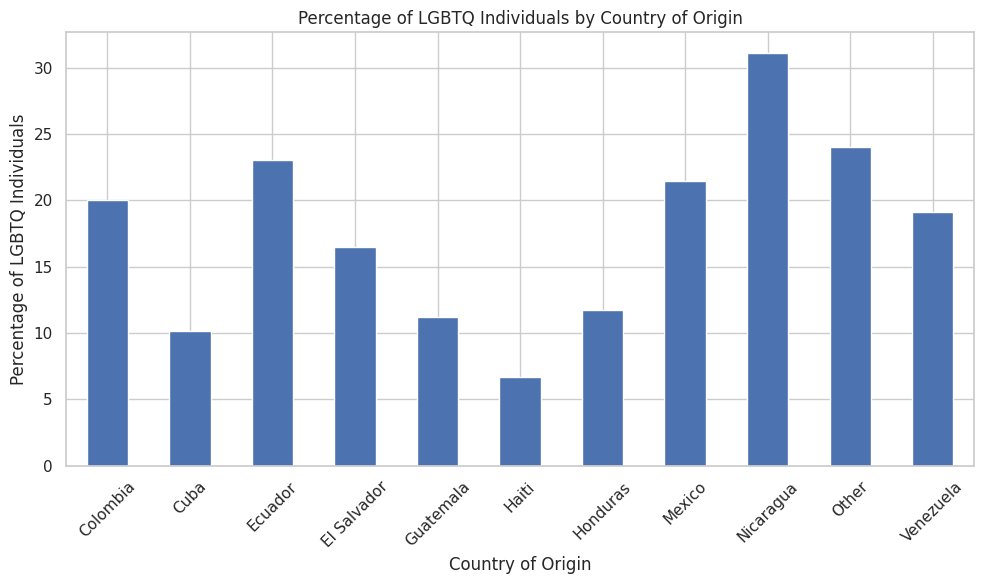

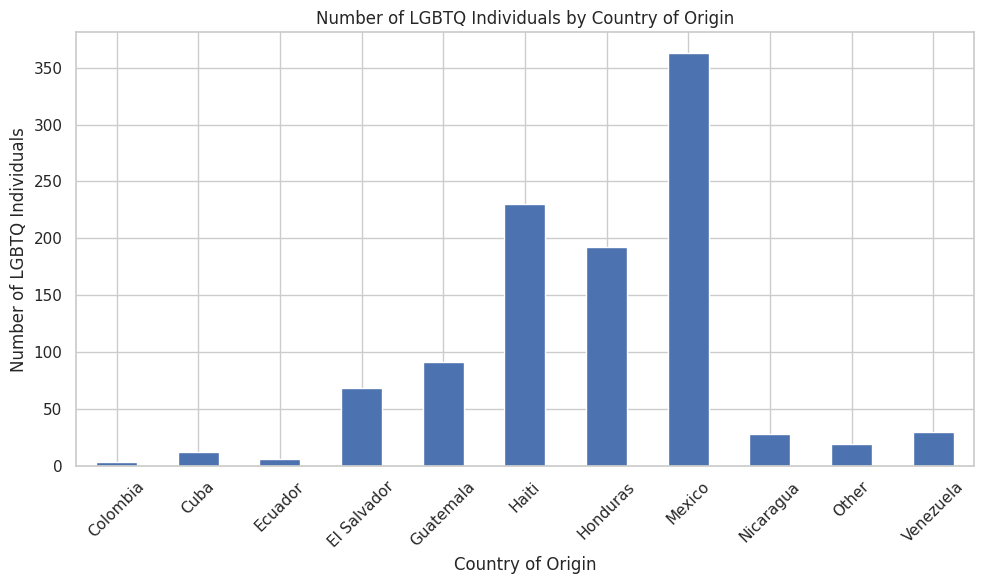

In [14]:
###LGBTQ by Country Graph###
unknowns_removed = df[df["LGBTQ+"] != "Unknown"]
grouped = unknowns_removed.groupby('Country of Origin')

# Step 2: Calculate the total number of individuals from each country
total_individuals = grouped.size()
print(total_individuals.sum())

# Step 3: Calculate the total number of LGBTQ individuals from each country 
lgbtq_individuals = grouped['LGBTQ+'].apply(lambda x: (x == 'Si').sum())
#lgbtq_individuals = grouped['¿Se identifica como miembro de la comunidad LGBTQ+?'].sum()
print(total_individuals)
print(lgbtq_individuals)

# Step 4: Calculate the percentage of LGBTQ individuals for each country
percentages = (lgbtq_individuals / total_individuals) * 100

# Step 5: Plot the percentages on a bar graph
plt.figure(figsize=(10, 6))  # Set the size of the plot
percentages.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Percentage of LGBTQ Individuals')
plt.title('Percentage of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Set the size of the plot
lgbtq_individuals.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of LGBTQ Individuals')
plt.title('Number of LGBTQ Individuals by Country of Origin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


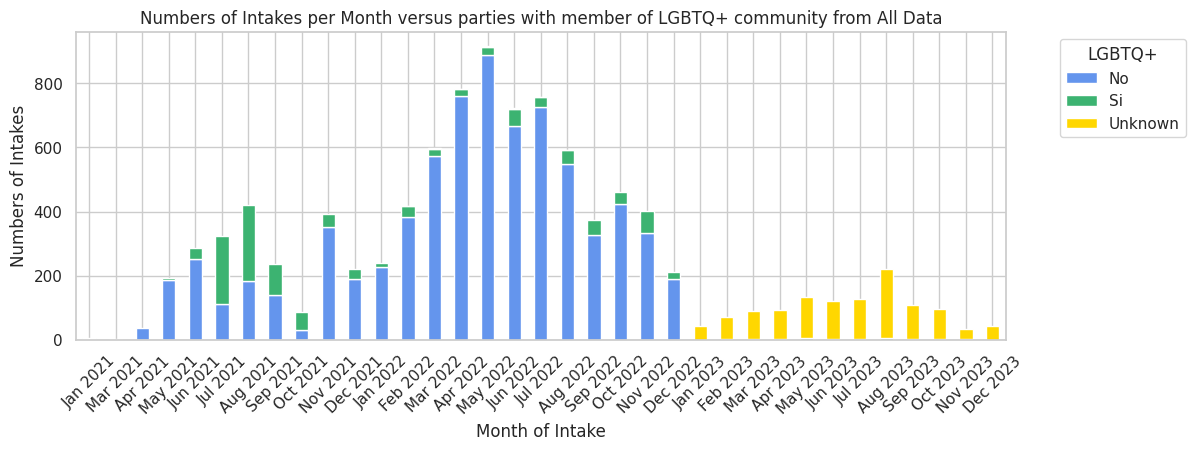

In [15]:
grouped = df.groupby(['Year', 'Month', 'LGBTQ+']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped #grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 6: Plot the bar graph
ax = percentages.plot(kind='bar', stacked=True,figsize=(12, 4), color=['#6495ED', '#3CB371', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
plt.xlabel('Month of Intake')
plt.ylabel('Numbers of Intakes')
plt.title('Numbers of Intakes per Month versus parties with member of LGBTQ+ community from All Data')
plt.legend(title='LGBTQ+', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.show()


In [16]:
replace_violence = {"Si / Yes" : True,
                    "No / No" : False,
                    "No lo sé / I don't know" : None}
df["Victim of Crime/Violence in Mexico"] = df["Victim of Crime/Violence in Mexico"].replace(replace_violence)
df["LGBTQ+"] = df["LGBTQ+"].replace({"Unknown" : None, "No" : False, "Si" : True}) 
grouped = df.groupby([ 'LGBTQ+','Victim of Crime/Violence in Mexico' ]).size().unstack(fill_value=0)
grouped



Victim of Crime/Violence in Mexico,False,True
LGBTQ+,,
False,1896,3935
True,53,893


In [17]:
print(grouped[True][True])
print(grouped[True][False])
print(grouped[False][True])
print(grouped[False][False])

893
3935
53
1896


In [18]:
percentage_of_LGBTQ_suffer_violence = grouped[True][True]/(grouped[False][True] + grouped[True][True])

percentage_of_non_LGBTQ_suffer_violence = grouped[True][False]/(grouped[True][False] + grouped[False][False])

print(f"percentage of violence by non-LGBTQ+ parties - {percentage_of_non_LGBTQ_suffer_violence:.2%}\npercentage of violence by LGBTQ+ parties - {percentage_of_LGBTQ_suffer_violence:.2%}")


percentage of violence by non-LGBTQ+ parties - 67.48%
percentage of violence by LGBTQ+ parties - 94.40%


In [19]:
percentage_of_total_that_suffer_violence = df["Victim of Crime/Violence in Mexico"].sum()/df["Victim of Crime/Violence in Mexico"].count()
print(f"percentage of violence by all parties - {percentage_of_total_that_suffer_violence:.2%}")

percentage of violence by all parties - 71.81%


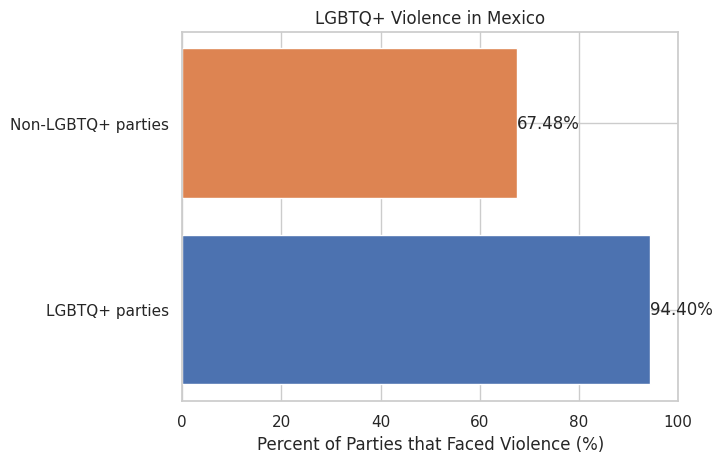

In [20]:
plt.barh("LGBTQ+ parties", percentage_of_LGBTQ_suffer_violence*100)
plt.text(percentage_of_LGBTQ_suffer_violence*100, "LGBTQ+ parties", f"{percentage_of_LGBTQ_suffer_violence:.2%}", va='center', ha='left')

plt.barh("Non-LGBTQ+ parties", percentage_of_non_LGBTQ_suffer_violence*100)
plt.text(percentage_of_non_LGBTQ_suffer_violence*100, "Non-LGBTQ+ parties", f"{percentage_of_non_LGBTQ_suffer_violence:.2%}", va='center', ha='left')


# Adding labels and title
plt.xlabel('Percent of Parties that Faced Violence (%)')
plt.title('LGBTQ+ Violence in Mexico')

plt.xlim(0,  100)  # Adjust multiplier as needed to provide sufficient space

plt.savefig('LGBTQ+ Violence Faced in Mexico.png', bbox_inches='tight')


# Show plot
plt.show()


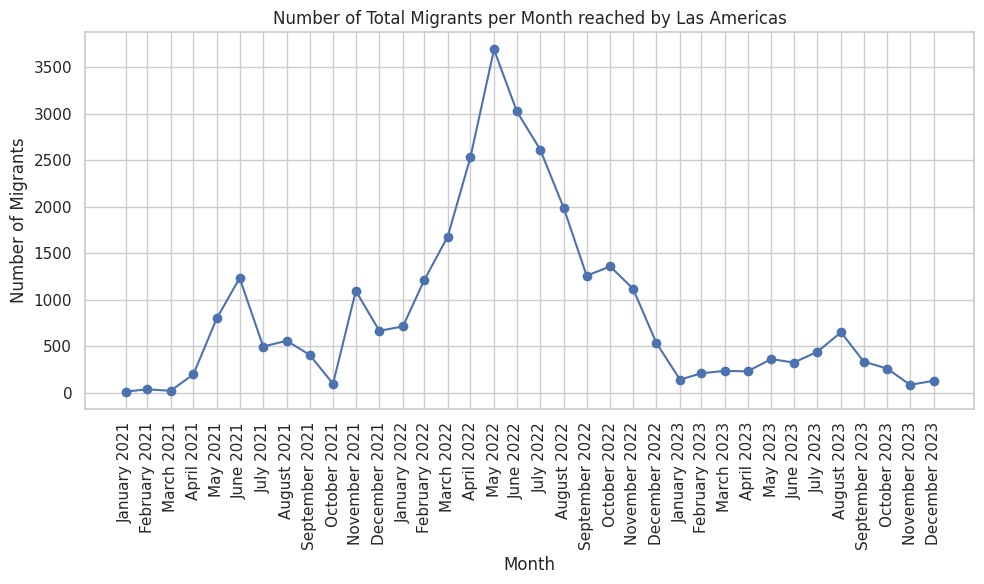

In [21]:
#monthly_counts = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
import numpy as np

# Repeat each row based on the 'value' column
repeated_data = np.repeat(df.values, df['Total Family Members'], axis=0)

# Create a new DataFrame with the repeated rows
df_repeated = pd.DataFrame(repeated_data, columns=df.columns)

# Resetting index to avoid duplicate index values
df_repeated.reset_index(drop=True, inplace=True)


monthly_counts = df_repeated.groupby(pd.Grouper(key='Date', freq='M')).size()

#monthly_counts = (df['Total Family Members'] * df.groupby(pd.Grouper(key='Date', freq='M')).size()).astype(int)
#monthly_counts = monthly_counts.loc[monthly_counts.index.repeat(monthly_counts['Total Family Members'])]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Number of Total Migrants per Month reached by Las Americas')
plt.xlabel('Month')
plt.ylabel('Number of Migrants')
plt.xticks(monthly_counts.index, monthly_counts.index.strftime('%B %Y'), rotation=90)
plt.savefig('Total Migrants.png', bbox_inches='tight')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
monthly_counts.mean()

852.1666666666666

In [23]:
monthly_counts.max()

3690

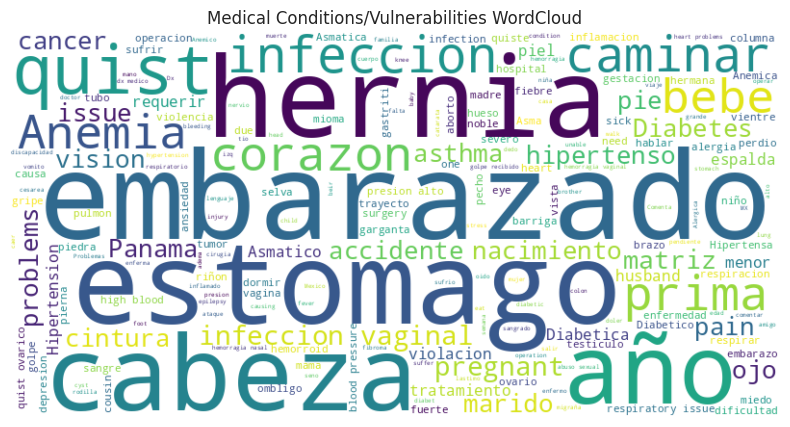

In [24]:
import requests
url = 'https://raw.github.com/stopwords-iso/stopwords-es/master/stopwords-es.txt'
req = requests.get(url)
spanish_stopwords = set(STOPWORDS)
spanish_stopwords.update(req.content.decode("utf-8").split("\n"))
spanish_stopwords.update(["mes", "esposo", "primo","ciudad","calle","hijo","hija", "esposa", "wife", "daughter","son","problema", "problem", "dolor", "padecer", "hermano"])


df_text = df.dropna(subset=['Explain Health Problem'])
text_data = ' '.join(df_text['Explain Health Problem'].astype(str))
tokens = word_tokenize(text_data)

# Lemmatize using spaCy on the original tokens
nlp = spacy.load('es_core_news_sm')
lemmatized_text = ' '.join([token.lemma_ for token in nlp(' '.join(tokens))])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=spanish_stopwords, background_color='white').generate(lemmatized_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Medical Conditions/Vulnerabilities WordCloud")
plt.show()

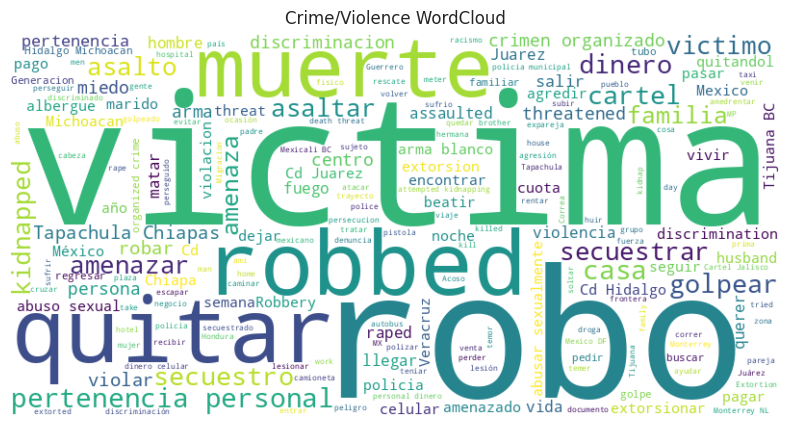

In [25]:
df_text = df.dropna(subset=['Explain Crime/Violence'])
text_data = ' '.join(df_text['Explain Crime/Violence'].astype(str))
tokens = word_tokenize(text_data)

# Lemmatize using spaCy on the original tokens
lemmatized_text = ' '.join([token.lemma_ for token in nlp(' '.join(tokens))])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=spanish_stopwords, background_color='white').generate(lemmatized_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Crime/Violence WordCloud")
plt.show()

In [26]:
#df['Age'] = pd.to_datetime(df['Date'], infer_datetime_format=True, format='mixed') - pd.to_datetime(df['Date of Birth'], infer_datetime_format=True, format='mixed')
def remove_bad_dates(date):
    if type(date) is type(datetime):
        if int(date.year) < 1940:
            return None
        else:
            return date
    else:
        return date
def find_age(age_in_days):
    return age_in_days.days//365.25
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce', format='mixed')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='mixed')
df['Date of Birth'] = df['Date of Birth'].apply(remove_bad_dates)
df['Date'] = df['Date'].apply(remove_bad_dates)
df['Age'] = (df['Date'] - df['Date of Birth'])
df['Age'] = df['Age'].apply(find_age)
df['Age']

0        28.0
1        31.0
2        56.0
3        50.0
4        50.0
         ... 
10918    11.0
10919    19.0
10920    31.0
10921    32.0
10922    38.0
Name: Age, Length: 10895, dtype: float64

In [27]:
df['Age'].median()

32.0

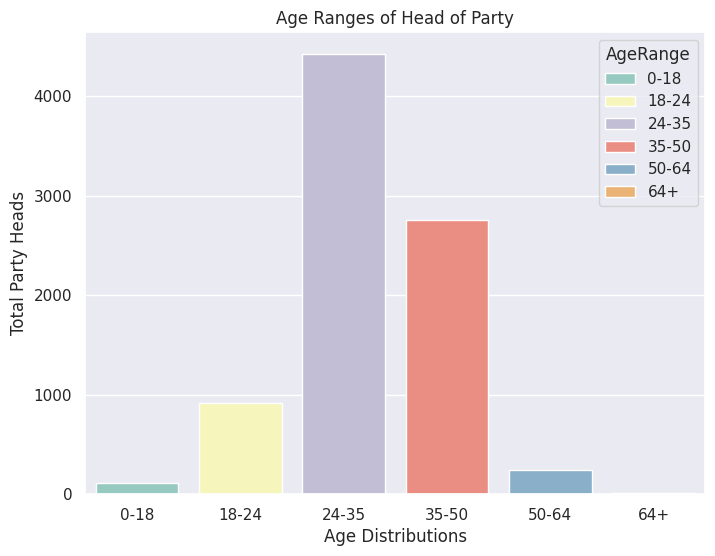

In [28]:
bins = [0, 18, 24, 35, 50, 64 , float('inf')]
labels = ['0-18', '18-24', '24-35', '35-50', '50-64','64+']

# Use pd.cut() to create a new column 'AgeRange' with age ranges
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count occurrences of each age range
age_range_counts = df['AgeRange'].value_counts()

# Print the resulting DataFrame
# Create a count plot using Seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

new_df = df[~df.index.duplicated()] #this works, i dont know why...

sns.countplot(x='AgeRange', data=new_df, palette="Set3", hue="AgeRange")

# Customize the plot (optional)
plt.title('Age Ranges of Head of Party')
plt.xlabel('Age Distributions')
plt.ylabel("Total Party Heads")
plt.savefig("Age Ranges of Head of Party.png")
# Show the plot
plt.show()


In [29]:
age_range_counts

AgeRange
24-35    4419
35-50    2752
18-24     920
50-64     248
0-18      109
64+        15
Name: count, dtype: int64

In [30]:
def find_gbv(row):
    word_list = ["viola", "rape", "abuso","gbv"]
    explanations = (row["Notes"] + row['Explain Crime/Violence']).lower()
    for word in word_list:
                if word in explanations:
                    return True
    return False

df['Notes'] = df['Notes'].fillna("")
df['Explain Crime/Violence'] = df['Explain Crime/Violence'].fillna("")
df['GBV'] = df.apply(find_gbv, axis=1)


df['GBV'].value_counts()

GBV
False    10065
True       830
Name: count, dtype: int64

In [31]:
def find_gbv(row):
    word_list = ["viola", "rape", "abuso", "sexual","gbv"]
    explanations = (row["Notes"] + row['Explain Crime/Violence']).lower()
    for word in word_list:
                if word in explanations:
                    return True
    return False

df['Notes'] = df['Notes'].fillna("")
df['Explain Crime/Violence'] = df['Explain Crime/Violence'].fillna("")
df['GBV'] = df.apply(find_gbv, axis=1)


df['GBV'].value_counts()

GBV
False    9703
True     1192
Name: count, dtype: int64

In [32]:
random_rows = df[df['GBV'] == True].sample(8)

# Print the random rows
print(str(random_rows['Explain Crime/Violence']))


4688                                                      
9004     En Chiapas ella fue violada por 2 hombres al i...
6645     En Xochimilco, MX tubo abuso y agresiones, dis...
7072                                    Violacion y golpes
9272     En Tapachul;a, Chiapas, ella fue victima de vi...
5049                                         abuso verbal 
10172    mother's pregnancy is a result of rape that oc...
8964                                                      
Name: Explain Crime/Violence, dtype: object


In [33]:
# 1192 / (9703 + 1192) = 10.9% are subject to GBV 

In [34]:
df.iloc[3737]['Explain Crime/Violence']

'En Tijuana, BC ha sido victima de asalto con arma de fuego, saliendo de su trabajo y le quitaron su cartera. Llegando a esta Cd. Juarez tomando un taxi el y su hermana fueron asaltados por el chofer, llevandolos a otro lugar diferente del solicitado.'

In [35]:
from fuzzywuzzy import fuzz

# Assuming 'df' is your DataFrame and 'name_column' is the column with names
# Replace 'df' with your DataFrame and 'name_column' with the actual column name

# Load your DataFrame
# df = pd.read_csv('your_data.csv')

# Define a threshold for similarity
threshold = 80  # You can adjust this value based on your requirement

# Function to find similar names
def find_similar_names(names):
    similar_names = []
    for i, name1 in enumerate(names):
        for j, name2 in enumerate(names):
            if i != j and fuzz.ratio(name1, name2) >= threshold:
                similar_names.append((name1, name2))
    return similar_names

# Extract names from the column
names = df['Name'].dropna().tolist()

# Find similar names
similar_names = find_similar_names(names)


In [36]:
similar_names

[('Reina Suya para Salvador Diaz', 'Reina Suyapa Salvador Diaz'),
 ('Mario Alberto Deras Alvarado', 'Mario Roberto Vega Alvarado'),
 ('Maria Guadalupe Romero Lopez', 'Maria Gudalupe Romero Sosa'),
 ('Selena del Carmen Rodriguez Valdez', 'Selena Del Carmen Rodriguez Valdez'),
 ('Elizabeth Diaz Morales', 'Elizabeth Villalobos Morales'),
 ('Martha Adalinda Quintanilla Villanueva',
  'Martha Adalinda Quintanilla Villanueva'),
 ('Reina Suyapa Salvador Diaz', 'Reina Suya para Salvador Diaz'),
 ('Silvia Gutierrez Quirino', 'Silvia Gutierrez Aguilar'),
 ('Javier Hernandez Zurita', 'Javier Hernandez Zantis'),
 ('Yessica del Carmen Aquino Bentancurt',
  'Jessica del Carmen Aguiño Bentancourt'),
 ('Jessica del Carmen Aguiño Bentancourt',
  'Yessica del Carmen Aquino Bentancurt'),
 ('Armando José Garcia Diaz', 'Armando Jose Garcia Diaz'),
 ('Luis Alberto Perez Molina', 'Luis Alberto Hernandez Montoya'),
 ('Marco Antonio Garcia Martinez ', 'Marlon Antonio Artola Martinez'),
 ('Julissa Cruz Ramirez'

In [37]:
len(similar_names)

5738

In [38]:
mapping = {}

for name1, name2 in similar_names:
    root1 = name1
    root2 = name2
    
    # Find the root of each name's group
    while mapping.get(root1, None):
        root1 = mapping[root1]
    while mapping.get(root2, None):
        root2 = mapping[root2]
    
    # Merge groups and set representative name
    if root1 != root2:
        mapping[root2] = root1

# Replace similar names with representative names in the DataFrame
df['Name'] = df['Name'].apply(lambda x: mapping.get(x, x))


In [39]:
df

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Location,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,Birth Country,Month,Year,Age,AgeRange,GBV
0,2023-01-24,Andrea Arias Guillen,Mexico,1994-12-16,Solo el proceso fue lento con la app del CBPone,1,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,28.0,24-35,False
1,2023-01-24,Winder Roberto Pernia Jimenez,Colombia,1991-10-15,,4,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,31.0,24-35,False
2,2023-01-24,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05,,3,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,56.0,50-64,False
3,2023-01-24,Pedro Rios,Mexico,1972-06-11,,1,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,50.0,50-64,False
4,2023-01-24,Lesly Martinez,Honduras,1972-04-13,No puede enviar su informacion ha batallado mu...,1,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,50.0,50-64,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,2021-06-11,Rosa Maria Sales,Guatemala,2009-08-07,Verified no status in a third country/no US de...,4,No,False,NaN,NaN,No,NaN,NaN,,NaN,6.0,2021.0,11.0,0-18,False
10919,2021-06-11,Liliana Maseda Roque,Mexico,2001-10-12,,2,Si,False,NaN,NaN,No,NaN,NaN,Por amenazas tengo mucho miedo q me maten ami ...,NaN,6.0,2021.0,19.0,18-24,False
10920,2021-06-11,Keyli Ninora Zepeda Vanegas,Honduras,1989-11-06,,2,Si,False,NaN,NaN,No,NaN,NaN,Pues me da miedo salir ala calle me da miedo m...,NaN,6.0,2021.0,31.0,24-35,False
10921,2021-06-11,Brenda Yamilet Lara Faraona,Honduras,1989-05-16,Verified no status in a third country/no US de...,3,Si,False,NaN,NaN,Si,Estoy padesiendoede trauma insomnio nervios,NaN,Yo Brenda Yamileth Lara barahona fui secuestra...,NaN,6.0,2021.0,32.0,24-35,True


In [40]:
df['Name'].value_counts()

Name
John Guenol Pierre                9
Willie Pierre                     8
Jesus Villanueva Hernandez        7
Oster Joseph                      7
Jeanely Louis                     7
                                 ..
Carla Patricia Parada Alvarado    1
Juana Jimenez Mendez              1
Jerson Armando Nuñez Espinal      1
Rixi Moreno Cortes                1
Luis Javier Flores Vanega         1
Name: count, Length: 8593, dtype: int64

In [41]:
df_no_duplicates = df.drop_duplicates(subset=['Name'])
df_no_duplicates

,Date,Name,Country of Origin,Date of Birth,Notes,Total Family Members,Victim of Crime/Violence,LGBTQ+,Location,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,Birth Country,Month,Year,Age,AgeRange,GBV
0,2023-01-24,Andrea Arias Guillen,Mexico,1994-12-16,Solo el proceso fue lento con la app del CBPone,1,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,28.0,24-35,False
1,2023-01-24,Winder Roberto Pernia Jimenez,Colombia,1991-10-15,,4,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,31.0,24-35,False
2,2023-01-24,Maria de la Luz Gonzalez Olvera,Mexico,1966-12-05,,3,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,56.0,50-64,False
3,2023-01-24,Pedro Rios,Mexico,1972-06-11,,1,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,50.0,50-64,False
4,2023-01-24,Lesly Martinez,Honduras,1972-04-13,No puede enviar su informacion ha batallado mu...,1,Unknown,None,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,2023.0,50.0,50-64,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10911,2021-06-10,Ingrid Esperanza Argueta Ruano,Guatemala,2011-08-09,"Verify correct citizenship for mother, birthda...",3,Si,False,NaN,NaN,Si,Me cuesta pronunciar las palabras,NaN,Por que practicamente nos quedamos sin nada,NaN,6.0,2021.0,9.0,0-18,False
10914,2021-06-11,Lesbia Yareli Gradiz,Honduras,2021-01-11,Verify DOB,1,Si,False,NaN,NaN,No,NaN,NaN,Estuve en un cuarto donde me brindaron apoyo y...,NaN,6.0,2021.0,0.0,0-18,False
10916,2021-06-11,Maria Liliana Castro,Guatemala,2003-03-16,,1,Si,False,NaN,NaN,No,NaN,NaN,Si me secuestraron 2 días me amenazaron con m...,NaN,6.0,2021.0,18.0,18-24,False
10918,2021-06-11,Rosa Maria Sales,Guatemala,2009-08-07,Verified no status in a third country/no US de...,4,No,False,NaN,NaN,No,NaN,NaN,,NaN,6.0,2021.0,11.0,0-18,False


In [42]:
df['Total Family Members'].count()

10895